# Chapitre 6 : KMeans : Clustering avec Scikit-learn
Email : <a href='mailto:madani.a@ucd.ac.ma'>madani.a@ucd.ac.ma</a>
<img src='images/robot.png'>
## Introduction
<p>
Le clustering est la tâche qui consiste à regrouper, de façon non supervisée, un ensemble d’objets ou plus largement de données, de telle manière que les objets d’un même groupe (appelé cluster) sont plus proches (au sens
d’un critère de (dis)similarité choisi) les unes aux autres que celles des autres groupes
(clusters). L’idée est donc de découvrir des groupes au sein des données, de façon automatique.
</p>
<p>
Dans ce cadre plusieurs méthodes ont été développées, la plus populaire est celle
des k moyennes (K-means), elle doit sa popularité à sa simplicité et sa capacité de
traiter de larges ensembles de données.
</p>
<p>
K Means est un algorithme de clustering non supervisé. Son objectif est de trouver des clusters formés de données basées sur leurs attributs (pas leurs labels, comme dans le cas de la classification).
</p>
<p>
L'algorithme k-means recherche un nombre prédéterminé de clusters dans un ensemble de données multidimensionnel non étiqueté. Il accomplit cela en utilisant une conception simple :
</p>
<ul>
<li>Le "centre du cluster" est la moyenne arithmétique de tous les points appartenant au cluster.
<li>Chaque point est plus proche de son propre centre du cluster que les centres des autres clusters.
</ul>
<p>
Ces deux hypothèses sont à la base du modèle k-means. Nous allons bientôt plonger dans la façon exacte dont l'algorithme atteint cette solution, mais pour l'instant, jetons un coup d'œil sur un ensemble de données simple et voyons le résultat de k-means.
</p>

## KMeans avec Scikit-learn

<p>
Comme de nombreux algorithmes de machine learning, k-means est disponible dans Scikit-Learn. Il suffit d'importer le module sklearn.cluster.KMeans.
</p>
<p>
Regardons comment KMeans fonctionne sur les clusters simples.
</p>

### Exemple 1

<p>
Supposons que nous disposons d'un ensemble de films, chacun est caractérisé par :
<ul>
<li> #kicks : nombre de coup de poing
<li> #kisses : nombre de baisers
</ul>
L'idée est de regrouper ces films en deux catégories, Action et Romantique, par exemple.
</p>



In [1]:
from sklearn.cluster import KMeans
#films représente un ensemble de films, chaque film possède le nombre
#de kicks et le nombre de kisses sous forme de [#kicks, #kisses]
films = [[100, 20], [38, 160],[80, 67],[50, 150]]
kmeans = KMeans(n_clusters=2)
kmeans.fit(films)
categorie = kmeans.predict(films)

print (films)

print(categorie)

[[100, 20], [38, 160], [80, 67], [50, 150]]
[0 1 0 1]


<p>
Comme on peut le remarquer du code ci-dessus, le premier et le troisième film font partie du cluster 0 (films action), alors que le deuxième et le quatrième appartiennent au cluster 1 (films romantique).
</p>

### Exemple 2

<p>
Voyons un autre exemple représentant les clusters sous forme de visualisations (graphiques).
</p>
<p>
Nous commençons par les importations standard:
</p>

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

<p>
Ensuite, nous générons un ensemble de données bidimensionnel contenant quatre groupes distincts.
</p>

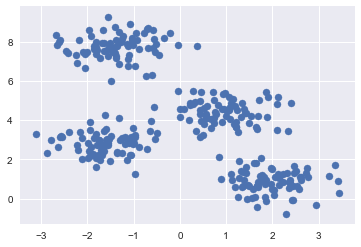

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

<p>
Comme on peut le remarquer clairement, les données sont regroupées en quatre clusters.
</p>
<p>
Voyons maintenant comment l'algorithme K-Means fait ceci en utilisant Scikit-learn :
</p>

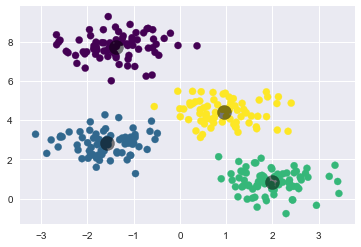

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(4)  # 4 clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);